<a href="https://colab.research.google.com/github/Ocelani/golang-github-gql/blob/main/data-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Repositórios populares
 ## Lab de Medição e Experimentação de Software

--------




In [327]:
import pandas as pd
import numpy as np
import time


df = pd.read_csv('/content/data.csv')
  
df.head(10)

,RankID,RepoID,Name,URL,CreatedAt,UpdatedAt,Owner,PrimaryLanguage,Stargazers,IssuesTotal,IssuesClosed,PullRequests
0,1,MDEwOlJlcG9zaXRvcnkyODQ1NzgyMw==,freeCodeCamp,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24T17:49:19Z,2020-09-26T15:04:34Z,freeCodeCamp,JavaScript,315010,14783,14579,24401
1,2,MDEwOlJlcG9zaXRvcnkxNzc3MzY1MzM=,996.ICU,https://github.com/996icu/996.ICU,2019-03-26T07:31:14Z,2020-09-26T15:05:04Z,996icu,Rust,251762,0,0,1856
2,3,MDEwOlJlcG9zaXRvcnkxMTczMDM0Mg==,vue,https://github.com/vuejs/vue,2013-07-29T03:24:51Z,2020-09-26T14:18:27Z,vuejs,JavaScript,172926,9192,8867,1878
3,4,MDEwOlJlcG9zaXRvcnkxMzQ5MTg5NQ==,free-programming-books,https://github.com/EbookFoundation/free-progra...,2013-10-11T06:50:37Z,2020-09-26T14:21:53Z,EbookFoundation,NaN,160111,460,424,3158
4,5,MDEwOlJlcG9zaXRvcnkxMDI3MDI1MA==,react,https://github.com/facebook/react,2013-05-24T16:15:54Z,2020-09-26T15:02:11Z,facebook,JavaScript,156430,9596,9130,10091
5,6,MDEwOlJlcG9zaXRvcnk0NTcxNzI1MA==,tensorflow,https://github.com/tensorflow/tensorflow,2015-11-07T01:19:20Z,2020-09-26T14:18:14Z,tensorflow,C++,148743,27847,24083,15508
6,7,MDEwOlJlcG9zaXRvcnkyMTI2MjQ0,bootstrap,https://github.com/twbs/bootstrap,2011-07-29T21:19:00Z,2020-09-26T14:54:48Z,twbs,JavaScript,144315,19608,19289,11411
7,8,MDEwOlJlcG9zaXRvcnkyMTczNzQ2NQ==,awesome,https://github.com/sindresorhus/awesome,2014-07-11T13:42:37Z,2020-09-26T14:58:27Z,sindresorhus,NaN,141444,257,242,1557
8,9,MDEwOlJlcG9zaXRvcnk2MDQ5MzEwMQ==,coding-interview-university,https://github.com/jwasham/coding-interview-un...,2016-06-06T02:34:12Z,2020-09-26T14:54:32Z,jwasham,NaN,135621,163,136,456
9,10,MDEwOlJlcG9zaXRvcnkxNDQ0MDI3MA==,You-Dont-Know-JS,https://github.com/getify/You-Dont-Know-JS,2013-11-16T02:37:24Z,2020-09-26T15:02:05Z,getify,NaN,127750,852,776,820


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2014-12-24 17:49:19+00:00 to 2014-09-20 16:37:28+00:00
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RankID           1000 non-null   int64 
 1   RepoID           1000 non-null   object
 2   Name             1000 non-null   object
 3   URL              1000 non-null   object
 4   UpdatedAt        1000 non-null   object
 5   Owner            1000 non-null   object
 6   PrimaryLanguage  881 non-null    object
 7   Stargazers       1000 non-null   int64 
 8   IssuesTotal      1000 non-null   int64 
 9   IssuesClosed     1000 non-null   int64 
 10  PullRequests     1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 93.8+ KB




---



 **RQ.01**

Sistemas populares são mais maduros/antigos?
      
 _Métrica: idade do repositório (calculado a partir da data de sua criação)_



In [322]:
created_at = {
    'Name': df.Name,
    'Owner': df.Owner,
    'CreatedAt': pd.to_datetime(df.CreatedAt),
  }
created_at = pd.DataFrame(created_at)
created_at = created_at.sort_values(by='CreatedAt', ascending=False)
created_at

,Name,Owner,CreatedAt
596,hello-algorithm,geekxh,2020-05-29 05:47:09+00:00
510,design-resources-for-developers,bradtraversy,2020-05-06 14:40:35+00:00
935,CnC_Remastered_Collection,electronicarts,2020-03-30 17:48:04+00:00
48,fucking-algorithm,labuladong,2020-02-19 09:01:23+00:00
347,COVID-19,CSSEGISandData,2020-02-04 22:03:53+00:00
...,...,...,...
122,jekyll,jekyll,2008-10-20 06:29:03+00:00
180,git,git,2008-07-23 14:21:26+00:00
812,reddit,reddit-archive,2008-06-18 23:30:53+00:00
98,rails,rails,2008-04-11 02:19:47+00:00


------

**RQ.02**
      
Sistemas populares recebem muita contribuição externa?

_Métrica: total de pullrequests aceitas_

In [331]:
pr = {
    'Name': df.Name,
    'Owner': df.Owner,
    'PullRequests': df.PullRequests,
  }
pr = pd.DataFrame(pr)
pr.sort_values(by='PullRequests', ascending=False)

,Name,Owner,PullRequests
672,homebrew-cask,Homebrew,84366
35,kubernetes,kubernetes,58833
865,kibana,elastic,50549
584,odoo,odoo,43967
105,ansible,ansible,43617
...,...,...,...
602,fanqiang,bannedbook,4
945,download,getlantern,4
721,SpringAll,wuyouzhuguli,3
653,architecture.of.internet-product,davideuler,3


-----

**RQ.04**
      Sistemas populares são atualizados com frequência?
      _Métrica: tempo até a última atualização (calculado a partir da data de última atualização)_

In [333]:
updated_at = {
    'Name': df.Name,
    'Owner': df.Owner,
    'UpdatedAt': pd.to_datetime(df.UpdatedAt),
  }
updated_at = pd.DataFrame(updated_at)
updated_at = updated_at.sort_values(by='UpdatedAt', ascending=False)
updated_at

,Name,Owner,UpdatedAt
953,awesome-datascience,academic,2020-09-26 15:06:00+00:00
936,NativeBase,GeekyAnts,2020-09-26 15:05:57+00:00
760,edex-ui,GitSquared,2020-09-26 15:05:51+00:00
106,nvm,nvm-sh,2020-09-26 15:05:23+00:00
300,mkcert,FiloSottile,2020-09-26 15:05:19+00:00
...,...,...,...
879,zepto,madrobby,2020-09-24 22:37:49+00:00
175,node-v0.x-archive,nodejs,2020-09-24 22:37:46+00:00
871,parallax,wagerfield,2020-09-24 21:03:05+00:00
991,ui-router,angular-ui,2020-09-23 21:10:57+00:00


-----

**RQ.05**
      Sistemas populares são escritos nas linguagens mais populares?
      _Métrica: linguagem primária de cada um desses repositórios_

In [334]:
prog_language = df['PrimaryLanguage'].value_counts().to_frame().reset_index()
prog_language.columns = ["Language", "Total"]
prog_language.head(20)

,Language,Total
0,JavaScript,283
1,Python,99
2,Java,81
3,TypeScript,62
4,Go,62
5,C++,48
6,HTML,23
7,Swift,22
8,Shell,22
9,C,21


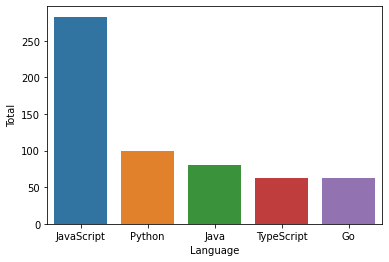

In [149]:
import seaborn as sns 

hd = prog_language.head()
sns.barplot(x="Language", y="Total", data = hd)

([<matplotlib.patches.Wedge at 0x7fdc154f3b70>,
 [Text(0.06178244908683376, 1.0982635972228312, 'JavaScript'),
  Text(-1.005537513762013, -0.4459756814191887, 'Python'),
  Text(-0.20773842181219046, -1.0802058822756802, 'Java'),
  Text(0.5985267821059695, -0.9229115294013146, 'TypeScript'),
  Text(1.039995871960762, -0.3583414381627869, 'Go')])

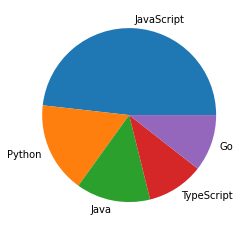

In [154]:
import matplotlib.pyplot as plt

plt.pie(hd["Total"], labels = hd['Language'])

------

**RQ.06**

Sistemas populares possuem um alto percentual de issues fechadas?


_Métrica: razão entre número de issues fechadas pelo total de issues_

In [279]:
most_issues = {
    'Name': df.Name,
    'IssuesTotal': df.IssuesTotal,
  }
most_issues = pd.DataFrame(most_issues)
most_issues = issues.sort_values(by='IssuesTotal', ascending=False)
most_issues.head(10)

,Name,IssuesClosed,IssuesTotal,IssuesClosed%
15,vscode,92476,97824,94.533039
16,flutter,35868,43735,82.012118
32,go,33945,40117,84.615001
35,kubernetes,34167,36201,94.381371
85,rust,30087,36044,83.472977
105,ansible,26621,28140,94.601990
865,kibana,21062,27949,75.358689
565,cockroach,24589,27863,88.249650
5,tensorflow,24083,27847,86.483284
44,TypeScript,23268,27768,83.794296


In [280]:
issues_closed = {
    'Name': df.Name,
    'IssuesClosed': df.IssuesClosed,
  }
issues_closed = pd.DataFrame(issues_closed)
issues_closed = issues.sort_values(by='IssuesClosed', ascending=False)
issues_closed.head(10)

,Name,IssuesClosed,IssuesTotal,IssuesClosed%
15,vscode,92476,97824,94.533039
16,flutter,35868,43735,82.012118
35,kubernetes,34167,36201,94.381371
32,go,33945,40117,84.615001
85,rust,30087,36044,83.472977
105,ansible,26621,28140,94.601990
565,cockroach,24589,27863,88.249650
5,tensorflow,24083,27847,86.483284
44,TypeScript,23268,27768,83.794296
71,elasticsearch,22283,24939,89.350014


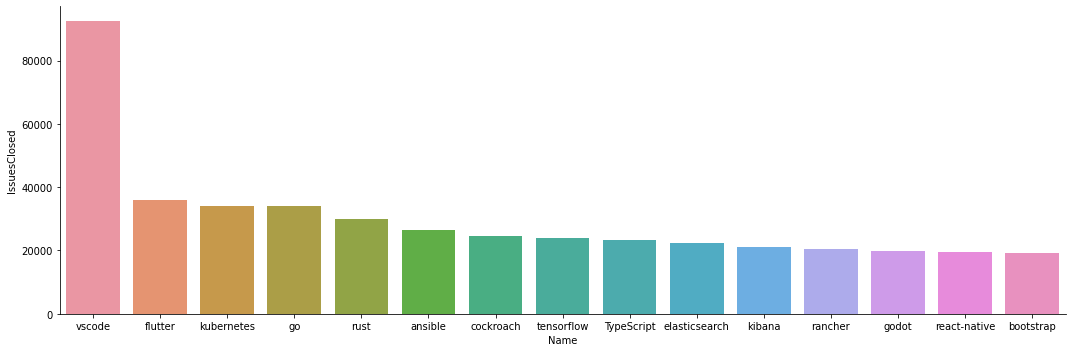

In [281]:
import seaborn as sns 

hd = issues_closed.head(15)
sns.catplot(x="Name", y="IssuesClosed", data = hd, kind="bar", aspect=3)

In [282]:
issues_open = {
    'Name': df.Name,
    'IssuesOpen': df.IssuesTotal - df.IssuesClosed,
    'IssuesClosed': df.IssuesClosed,
    'IssuesTotal': df.IssuesTotal,
  }
issues_open = pd.DataFrame(issues_open)
issues_open = issues_open.sort_values(by='IssuesOpen', ascending=False)
issues_open.head(10)

,Name,IssuesOpen,IssuesClosed,IssuesTotal
16,flutter,7867,35868,43735
226,XX-Net,7618,5049,12667
865,kibana,6887,21062,27949
32,go,6172,33945,40117
85,rust,5957,30087,36044
45,Font-Awesome,5510,11000,16510
15,vscode,5348,92476,97824
115,pytorch,5045,11309,16354
190,godot,4819,19754,24573
44,TypeScript,4500,23268,27768


In [291]:
issues_percent = {
    'Name': issues_open.Name,
    'IssuesClosed': issues_open.IssuesClosed,
    'IssuesTotal': issues_open.IssuesTotal,
    'IssuesClosed%': (issues_open.IssuesClosed * 100) / issues_open.IssuesTotal
  }
issues_percent = pd.DataFrame(issues_percent)
issues_percent_asc = issues_percent.sort_values(by='IssuesClosed%', ascending=False)
issues_percent_asc.head(20)

,Name,IssuesClosed,IssuesTotal,IssuesClosed%
265,legacy-homebrew,17038,17038,100.0
357,awesome-react-components,36,36,100.0
824,react-demos,28,28,100.0
664,jstraining,41,41,100.0
143,awesome-nodejs,90,90,100.0
836,SwiftGuide,27,27,100.0
771,awesome-tensorflow,10,10,100.0
167,awesome-ios,433,433,100.0
631,ipfs,202,202,100.0
49,30-seconds-of-code,258,258,100.0


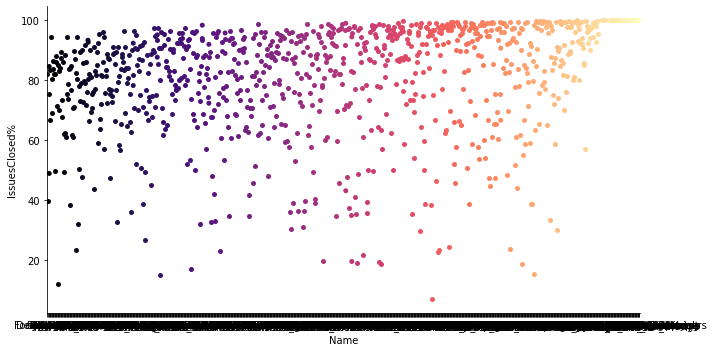

In [314]:
sns.catplot(x="Name", y="IssuesClosed%", data = issues_percent, kind="swarm", aspect=2, palette="magma")